In [1]:
#Illustration of K-means by example
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
%matplotlib inline

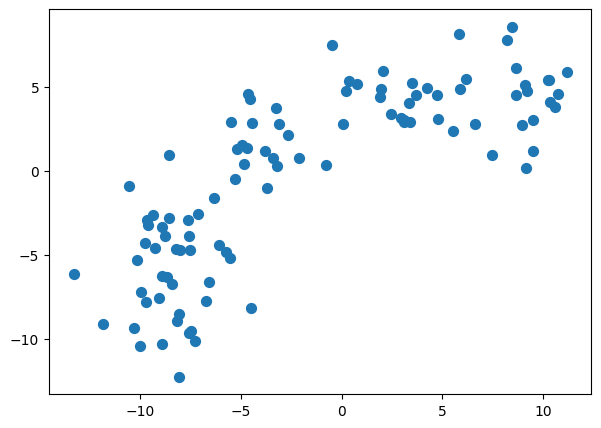

In [58]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=100, centers=5,
                       cluster_std=1.7)
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], s=50);

In [57]:
#X= np.array([[1,1.09730308441996],[2,2.43586442272545],[3,2.51116299518401],[4,3.03145539594202],[5,4.66664558877809],[6,3.93408456237042],[7,4.24949659312207],[8,6.20150698271801],[9,6.0717780921866],[10,6.26207315055509],[11,6.49586031797784],[12,7.83670100450654],[13,7.90940408673268],[14,7.64469311768879],[15,8.89462008041086],[16,9.78581223975706],[17,10.4556971391132],[18,9.96049095897342],[19,11.1624287278672],[20,10.4761409095033],[1,1.49645352156891],[2,0.386184701314561],[3,0.342639809355713],[4,-1.05240216629817],[5,-0.701740034637582],[6,-1.80026023417071],[7,-2.65310956496503],[8,-2.22901684720051],[9,-3.89566166009949],[10,-3.01016219363794],[11,-3.94613234180612],[12,-3.8858810837492],[13,-5.33174700485745],[14,-5.80441119639406],[15,-7.08279750222182],[16,-5.82853344603204],[17,-7.15756850228727],[18,-6.87082516687969],[19,-7.59311859408972],[20,-8.78511708923856],[1,3.77667823156857],[2,6.0743178686243],[3,6.76144670933566],[4,9.0193124434231],[5,10.7433356695474],[6,13.7056797616544],[7,16.2995356695637],[8,16.9272746711059],[9,19.1843689223608],[10,21.9390370354661],[11,24.2768927653876],[12,26.5418178220348],[13,27.2271960416962],[14,28.696383257999],[15,31.1041398803967],[16,34.1897421296044],[17,35.6038191352245],[18,37.2067736609178],[19,39.4470247254049],[20,42.1623526714938],[1,-0.664424941363579],[2,-1.78385945533055],[3,-4.84248894780797],[4,-7.18983262066937],[5,-7.61612120451894],[6,-11.4509236493259],[7,-11.9746140324827],[8,-14.2595170068448],[9,-16.9500700011744],[10,-18.3340175444392],[11,-21.4146247097464],[12,-22.8957674212245],[13,-25.2454461975581],[14,-27.5977188400436],[15,-29.1505799048792],[16,-29.5133464245803],[17,-32.4484765820864],[18,-35.3814788479149],[19,-36.1894299953562],[20,-38.118746586956]])
#X

In [4]:
X

array([[ 3.31331181e+00, -7.58612263e-01],
       [-4.16673695e+00, -1.48519913e+00],
       [ 3.07406083e+00,  6.56533089e+00],
       [-3.40544923e+00,  1.21337329e+00],
       [ 1.93086825e+00,  5.14271938e+00],
       [-2.67242387e+00,  4.83436578e-01],
       [-2.50101246e+00,  1.02466850e+00],
       [-7.08013217e+00,  9.79176678e+00],
       [ 3.24004807e+00,  6.27618736e+00],
       [-6.63292256e+00,  9.45918595e+00],
       [ 3.78830558e+00, -7.40237372e-01],
       [-6.67429416e+00,  9.92979966e+00],
       [ 2.37532446e+00,  6.14128845e+00],
       [-3.58663927e+00, -1.88498813e+00],
       [ 3.48485015e+00, -5.14086128e-01],
       [ 3.60718127e+00,  3.29852864e-02],
       [-6.59954485e+00,  9.32065824e+00],
       [-6.46500963e+00,  1.00295589e+01],
       [-3.14747865e+00,  2.20237350e-01],
       [ 1.75348546e+00,  6.41945229e+00],
       [ 2.64063859e+00,  6.47230026e+00],
       [-2.93316859e+00,  1.21048073e+00],
       [ 1.54572600e+00,  6.61763644e+00],
       [-3.

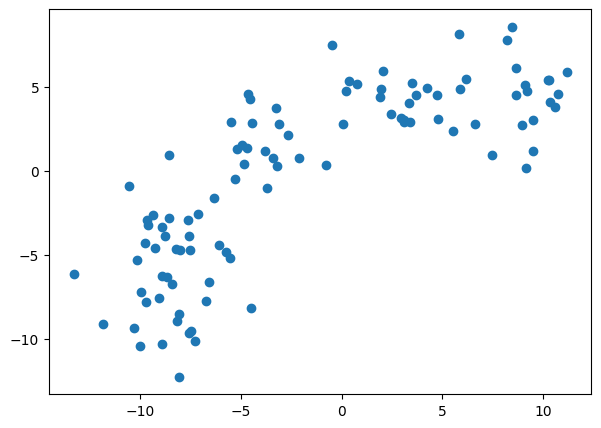

In [59]:
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1]);

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, max_iter=10000)
kmeans.fit(X)
labels = kmeans.predict(X)
print(labels)

[1 1 5 0 0 1 3 3 4 4 2 4 1 4 3 2 2 2 0 3 4 3 2 2 1 2 3 4 0 4 2 1 0 4 3 4 5
 0 1 4 3 1 0 1 0 4 0 0 2 2 3 1 1 2 3 4 0 0 4 5 0 4 5 1 1 5 2 2 3 2 0 3 2 5
 2 1 0 4 1 0 2 3 4 3 3 4 2 0 0 2 0 0 3 0 1 5 3 5 0 0]


In [63]:
np.round(X,0)

array([[  3.,   3.],
       [  6.,   8.],
       [  1.,   5.],
       [ -6.,  -2.],
       [ -6.,  -4.],
       [  4.,   5.],
       [  8.,   8.],
       [  7.,   1.],
       [ -8.,  -9.],
       [ -8., -10.],
       [ -5.,   5.],
       [ -8.,  -7.],
       [  6.,   5.],
       [ -9.,  -8.],
       [  8.,   9.],
       [ -4.,  -1.],
       [ -4.,   3.],
       [ -3.,   0.],
       [ -9.,  -3.],
       [ 11.,   4.],
       [ -9., -10.],
       [ 10.,   5.],
       [ -5.,   1.],
       [ -3.,   3.],
       [  6.,   5.],
       [ -5.,   4.],
       [  9.,   1.],
       [ -7., -10.],
       [-10.,  -3.],
       [ -7.,  -7.],
       [ -3.,   2.],
       [  5.,   5.],
       [ -9.,  -6.],
       [-10.,  -8.],
       [ 11.,   6.],
       [-10.,  -9.],
       [  2.,   6.],
       [ -8.,  -5.],
       [  3.,   3.],
       [ -8.,  -9.],
       [  9.,   5.],
       [  3.,   4.],
       [ -9.,  -3.],
       [  2.,   3.],
       [ -6.,  -5.],
       [-12.,  -9.],
       [-10.,  -5.],
       [ -8.,

In [64]:
#?kmeans

In [65]:
X.shape

(100, 2)

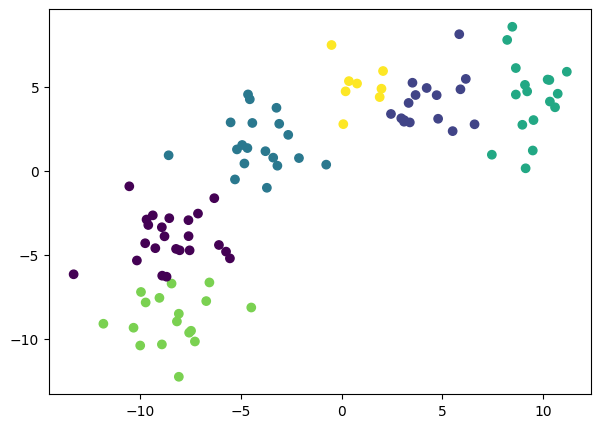

In [69]:
plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

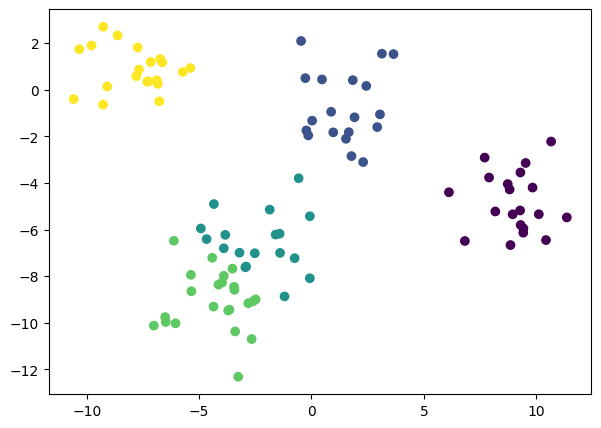

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=100000, init = 'random')
kmeans.fit(X)
labels = kmeans.predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

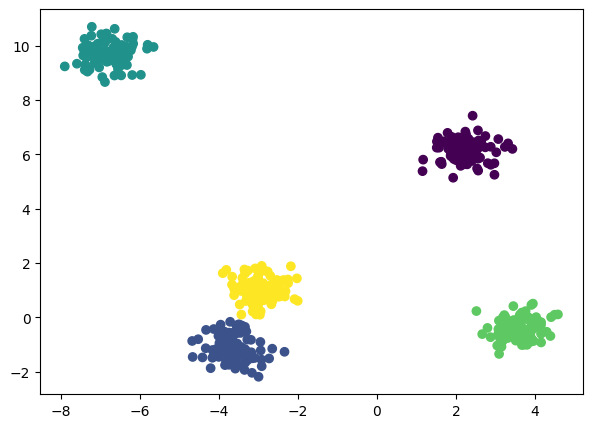

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,max_iter=1000000)
kmeans.fit(X)
labels = kmeans.predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

In [13]:
?kmeans

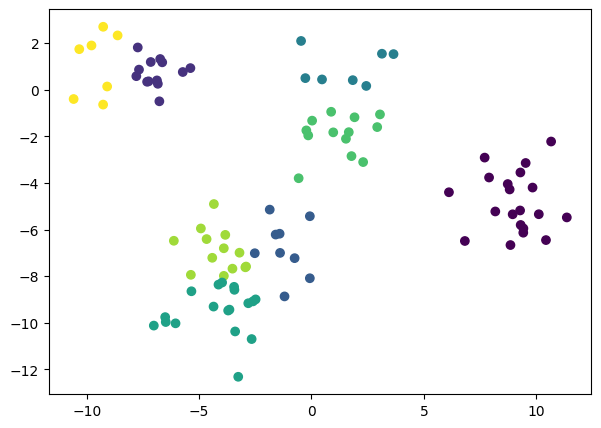

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8,max_iter=10000000000)
kmeans.fit(X)
labels = kmeans.predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

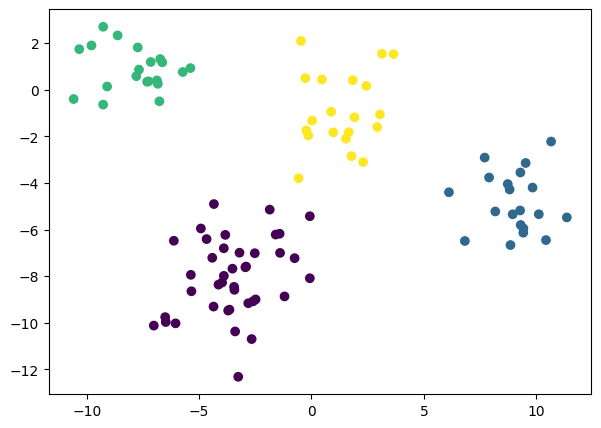

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,max_iter=10000000000)
kmeans.fit(X)
labels = kmeans.predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

In [30]:
kmeans.inertia_

424.11698688440936

In [31]:
kmeans.cluster_centers_

array([[ 1.34486186, -0.92781115],
       [-7.84029583,  0.86804411],
       [ 9.03833914, -4.82578866],
       [-3.50488289, -8.0472791 ]])

In [60]:
kmeansintertia = {}
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10)
    kmeans.fit(X)
    labels=kmeans.predict(X)
    kmeansintertia[k] = kmeans.inertia_

In [60]:
kmeansintertia

{2: 8346.064213811473,
 3: 1226.2049021920523,
 4: 598.9469208867711,
 5: 160.60200647076016,
 6: 147.4446052726826,
 7: 136.15707119052854,
 8: 122.03992074317262,
 9: 111.50061109804653,
 10: 106.32840607527574,
 11: 93.10600228963962,
 12: 88.4796009564095,
 13: 79.68720825761268,
 14: 73.77497888737305,
 15: 69.38703083598007,
 16: 64.13351757158165,
 17: 61.67907313607506,
 18: 57.53711531366294,
 19: 54.05624137877367,
 20: 51.61207819215256,
 21: 48.684106658155216,
 22: 46.945321364388214,
 23: 45.50486152205589,
 24: 43.76007539381578,
 25: 41.966290798896765,
 26: 40.07450274098945,
 27: 38.78130911111861,
 28: 38.39668631844053,
 29: 36.41091221671055,
 30: 35.61235095828454,
 31: 34.1932039578863,
 32: 32.6240546625658,
 33: 31.104981821556215,
 34: 30.70300800229148,
 35: 30.12329482483438,
 36: 29.59780019398442,
 37: 28.226963800151623,
 38: 27.224163977766832,
 39: 27.239427345235285,
 40: 26.458047285051695,
 41: 25.434314945630202,
 42: 24.68808680561736,
 43: 23.7191

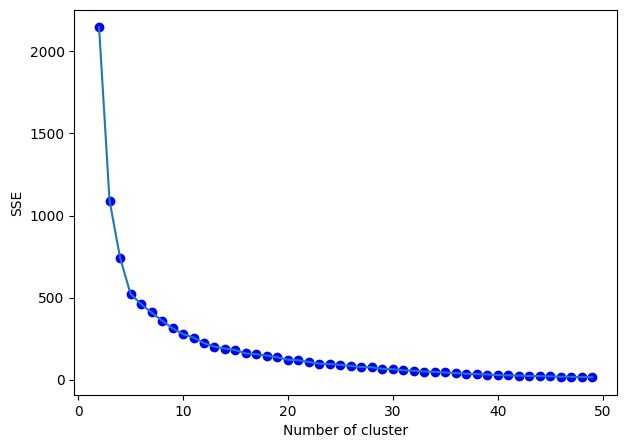

In [61]:
#Elbow Method
plt.figure(figsize=(7,5))
plt.plot(list(kmeansintertia.keys()), list(kmeansintertia.values()),'bo')
plt.plot(list(kmeansintertia.keys()), list(kmeansintertia.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [113]:
?plt.plot

In [34]:
#Deciding Optimal Number of CLusters:
from sklearn.metrics import davies_bouldin_score
sse,db = {}, {}
for k in range(2, 50):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X)
    labels=kmeans.predict(X)
    sse[k] = kmeans.inertia_ 
    # Inertia: Sum of squared distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X,labels)

In [40]:
labels

array([2, 3, 0, 0, 2, 3, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0, 0,
       3, 1, 0, 2, 3, 3, 2, 3, 0, 1, 0, 2, 3, 0, 0, 0, 1, 3, 0, 1, 3, 2,
       0, 0, 1, 3, 0, 3, 2, 2, 1, 0, 3, 0, 1, 2, 0, 2, 0, 1, 2, 2, 0, 0,
       3, 0, 1, 0, 1, 1, 3, 0, 1, 2, 3, 2, 1, 2, 0, 0, 2, 2, 1, 0, 3, 1,
       1, 2, 2, 0, 0, 0, 1, 0, 0, 3, 3, 0])

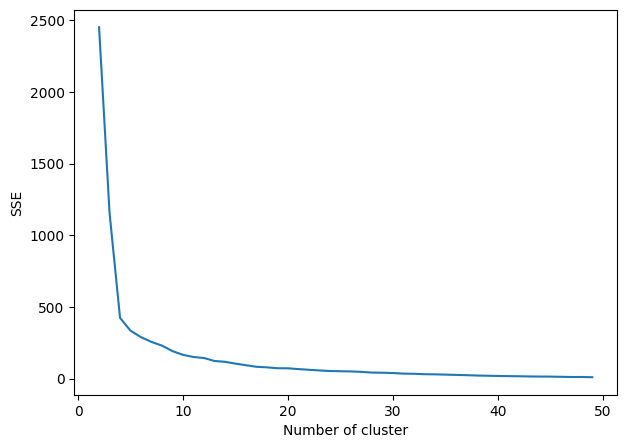

In [35]:
#Elbow Method
plt.figure(figsize=(7,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [36]:
db

{2: 0.8388685463679737,
 3: 0.5772606507293617,
 4: 0.4158530640221376,
 5: 0.6781578694850227,
 6: 0.6930418976103181,
 7: 0.822689267575184,
 8: 0.9120704987654216,
 9: 0.7569887919415976,
 10: 0.8440761586533112,
 11: 0.8591037784495712,
 12: 0.8040869543905699,
 13: 0.763165207141993,
 14: 0.829271049096693,
 15: 0.7313699680275231,
 16: 0.7498009263112414,
 17: 0.7110103026917436,
 18: 0.715123071590897,
 19: 0.7072444201459095,
 20: 0.7138122058004747,
 21: 0.6939150386262735,
 22: 0.7324984215112965,
 23: 0.6973989358502908,
 24: 0.6811614422346576,
 25: 0.6802146402504309,
 26: 0.6565531788188093,
 27: 0.6331000963869549,
 28: 0.6483127560084584,
 29: 0.5778426933712848,
 30: 0.615977737374959,
 31: 0.5975344631915618,
 32: 0.5872335597647647,
 33: 0.5487535176174025,
 34: 0.5579298072431708,
 35: 0.5429861143810947,
 36: 0.5477379192232094,
 37: 0.5209078631503109,
 38: 0.5216615413670848,
 39: 0.5107003796344696,
 40: 0.5200022254623449,
 41: 0.4920111882681415,
 42: 0.488598

In [20]:
sse

{2: 13054.613571618434,
 3: 2431.661586962893,
 4: 1236.7253711970088,
 5: 89.79325568605176,
 6: 82.01941984135432,
 7: 74.80544207164364,
 8: 69.4925362317797,
 9: 62.75521328526445,
 10: 57.90479096575302,
 11: 50.8181216029299,
 12: 47.91983778510457,
 13: 43.356541674475324,
 14: 39.13502927250718,
 15: 36.144164757726976,
 16: 34.10921452502269,
 17: 32.72184441357528,
 18: 31.044809249164274,
 19: 29.760240651726022,
 20: 28.0123055822744,
 21: 26.910919543535137,
 22: 25.883166480028677,
 23: 24.33755064569834,
 24: 23.709815885076488,
 25: 22.466504842137482,
 26: 21.736696602656064,
 27: 21.090863220439083,
 28: 20.63249329232111,
 29: 19.821544400535103,
 30: 19.512645157778707,
 31: 18.45954768987155,
 32: 17.874443847753696,
 33: 17.453245987428446,
 34: 16.918939368655224,
 35: 16.538531907526608,
 36: 16.251167036148274,
 37: 15.369938488998924,
 38: 15.184886444053655,
 39: 14.55638701292119,
 40: 14.273100529196618,
 41: 13.732904775165116,
 42: 13.142487242769054,
 43

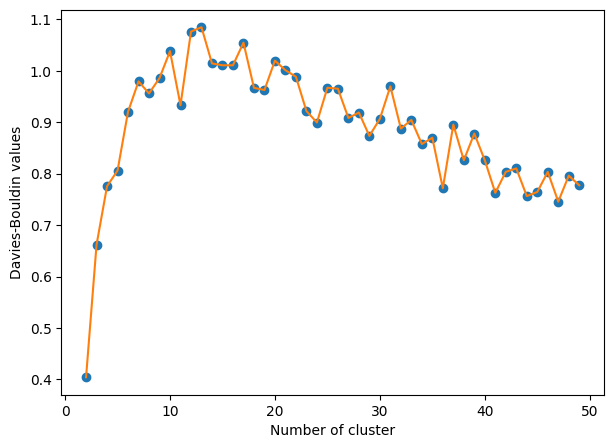

In [54]:
#Davis-Boldin index
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()), 'o')
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

In [70]:
#Accuracy metrics:
# Calculate Silhoutte Score
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.437


In [42]:
silhouette_score
# higher values indicating better clustering.

In [43]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [47]:
X, Y = load_iris(return_X_y=True)
ind = np.random.permutation(range(len(X)))
X = X[ind]
Y = Y[ind]

In [48]:
X

array([[6.1, 2.8, 4. , 1.3],
       [5.2, 4.1, 1.5, 0.1],
       [5.4, 3. , 4.5, 1.5],
       [4.3, 3. , 1.1, 0.1],
       [5.4, 3.4, 1.5, 0.4],
       [6.3, 2.3, 4.4, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.4, 2.8, 5.6, 2.1],
       [6.3, 3.4, 5.6, 2.4],
       [5.8, 2.8, 5.1, 2.4],
       [7.2, 3.2, 6. , 1.8],
       [5.6, 2.9, 3.6, 1.3],
       [4.8, 3. , 1.4, 0.3],
       [5.6, 2.8, 4.9, 2. ],
       [6. , 2.9, 4.5, 1.5],
       [7.2, 3. , 5.8, 1.6],
       [5. , 3.2, 1.2, 0.2],
       [6.7, 3. , 5. , 1.7],
       [6. , 3. , 4.8, 1.8],
       [4.8, 3.1, 1.6, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.4, 1.5, 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [6.4, 3.2, 5.3, 2.3],
       [6.6, 2.9, 4.6, 1.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [6.4, 2.7, 5.3, 1.9],
       [5.2, 3.5, 1.5, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [7.7, 3. , 6.1, 2.3],
       [5.7, 2.8, 4.1, 1.3],
       [5.5, 3.5, 1.3, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [6.5, 3

In [49]:
#Deciding Optimal Number of CLusters:
from sklearn.metrics import davies_bouldin_score
sse,db = {}, {}
for k in range(2, 50):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=10000,random_state=10).fit(X)
    labels=kmeans.predict(X)
    sse[k] = kmeans.inertia_ 
    # Inertia: Sum of squared distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X,labels)

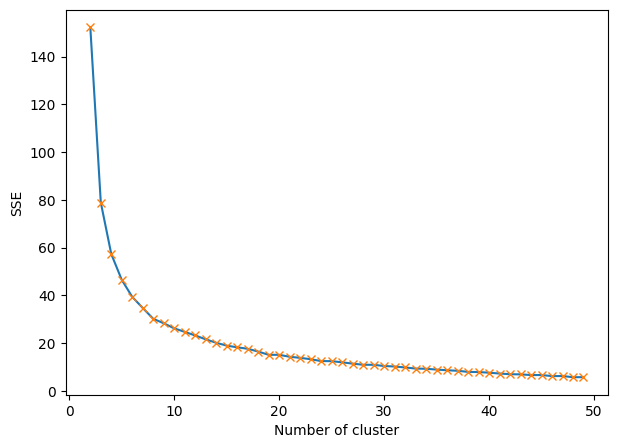

In [53]:
#Elbow Method
plt.figure(figsize=(7,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.plot(list(sse.keys()), list(sse.values()),"x")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

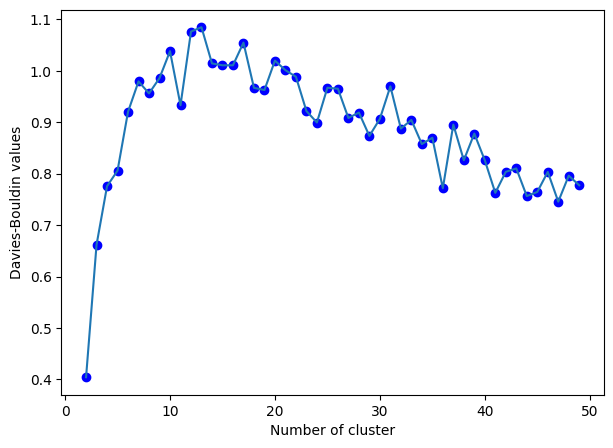

In [52]:
#Davis-Boldin index
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()), 'bo')
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()